PA100K数据集说明

We release a new pedestrian attribute recognition dataset -- PA-100K dataset, which is larger and more informative than the previous datasets. It contains **100,000 pedestrian images** annotated with **26 commonly used attributes** including global attributes like gender, age, and object level attributes like handbag, phone, upper-clothing and etc. It surpasses the the previous datasets both in quantity and diversity.

The PA-100K dataset was constructed by images captured from **real outdoor surveillance cameras** which is more challenging. The samples of one person was **extracted along its tracklets** in a surveillance video, and they are randomly assigned to one of these sets, in which case PA-100K dataset ensures the attributes are learned independent of the person's identity. So this partition based on tracklets is fairer than the partition that randomly shuffles the images in PETA dataset.

In [1]:
from pathlib import Path
import pickle
from tqdm import tqdm

import cv2
import numpy as np
from scipy.io import loadmat

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use("seaborn-whitegrid")

%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(20, 6),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

### 示例图片

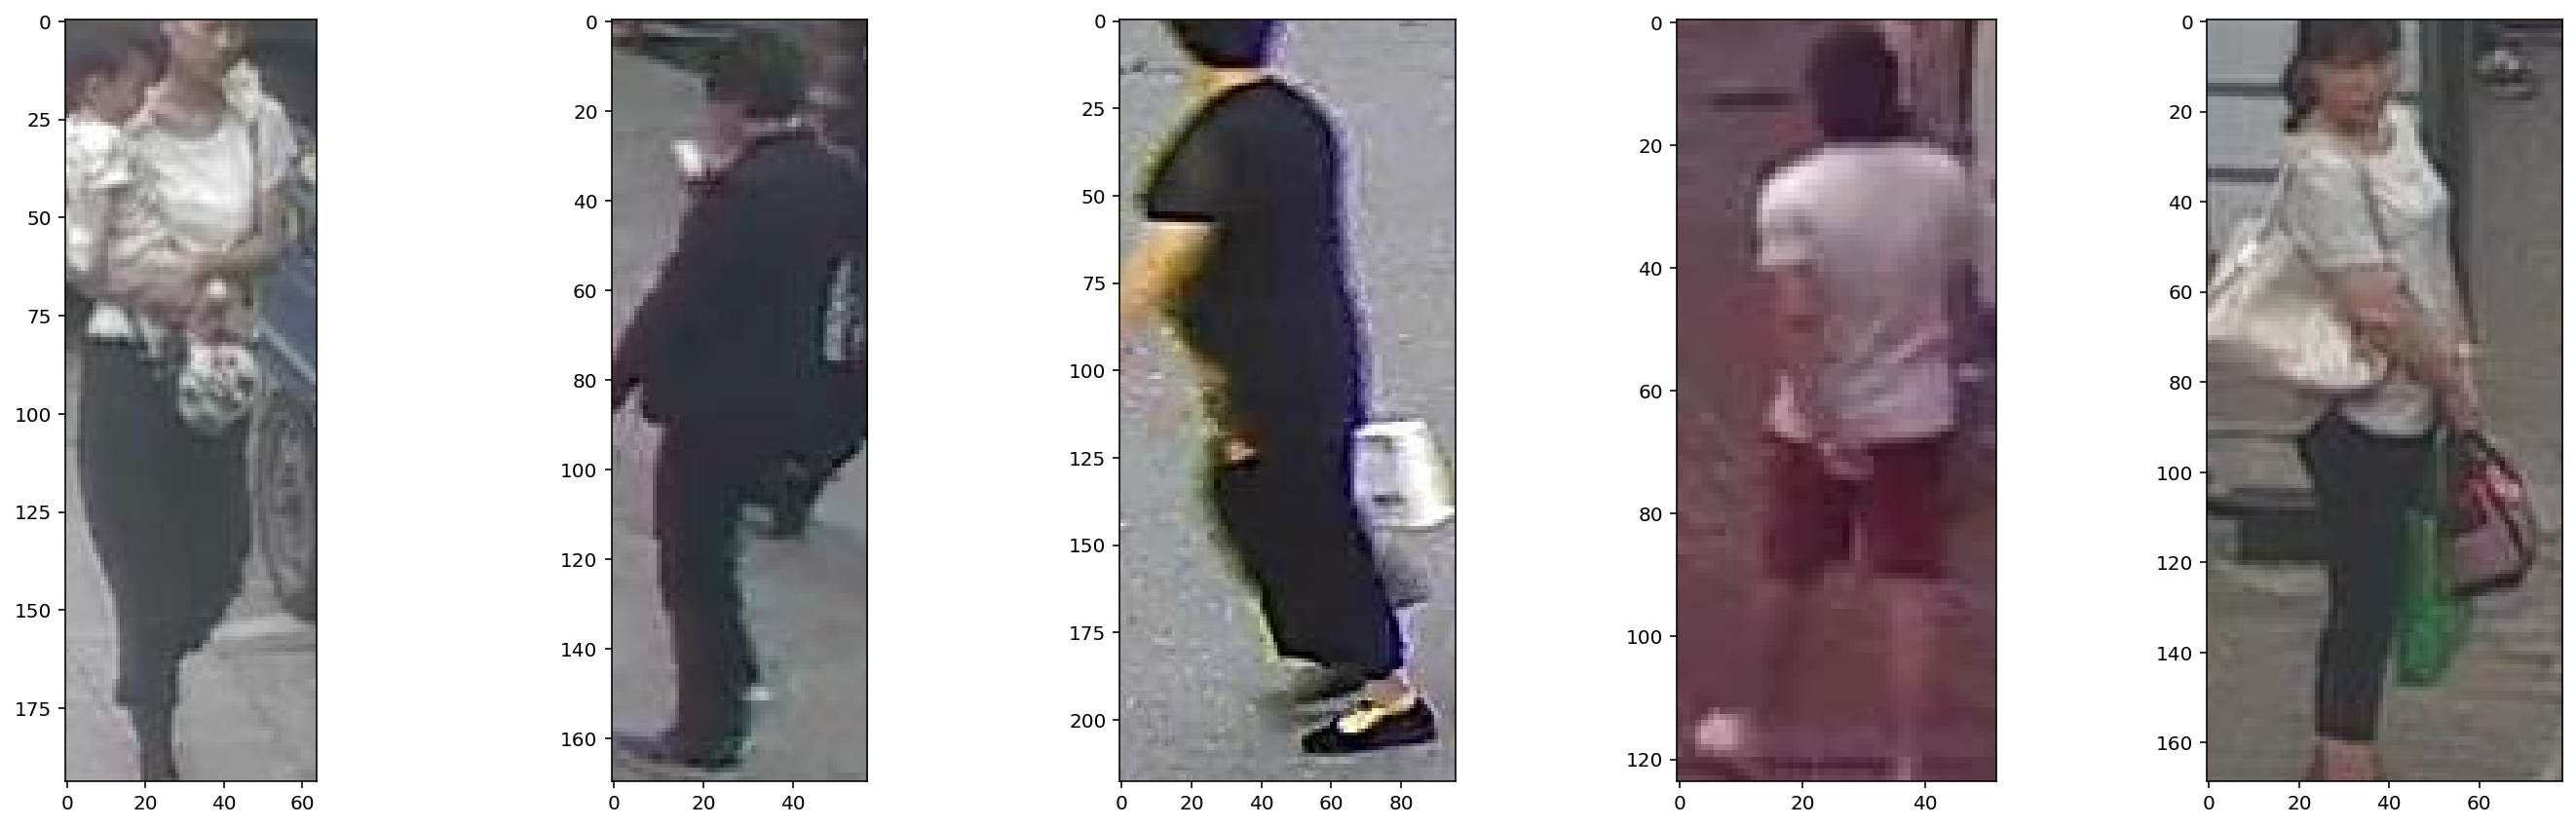

In [3]:
image_folder = "./PA100K_sample"
image_path_list = [str(path) for path in Path(image_folder).glob("*.jpg")]
fig, axes = plt.subplots(nrows=1, ncols=len(image_path_list))
for i in range(len(image_path_list)):
    image = cv2.imread(image_path_list[i])
    image = image[:, :, ::-1]
    axes[i].imshow(image)

### 图片尺寸分布

In [7]:
with open("PA100K_img_size.pkl", "rb") as size_file:
    image_size_list = pickle.load(size_file)

In [9]:
img_h = np.array([e[0] for e in image_size_list])
img_w = np.array([e[1] for e in image_size_list])

Text(0.5, 1.0, 'width&height scatter')

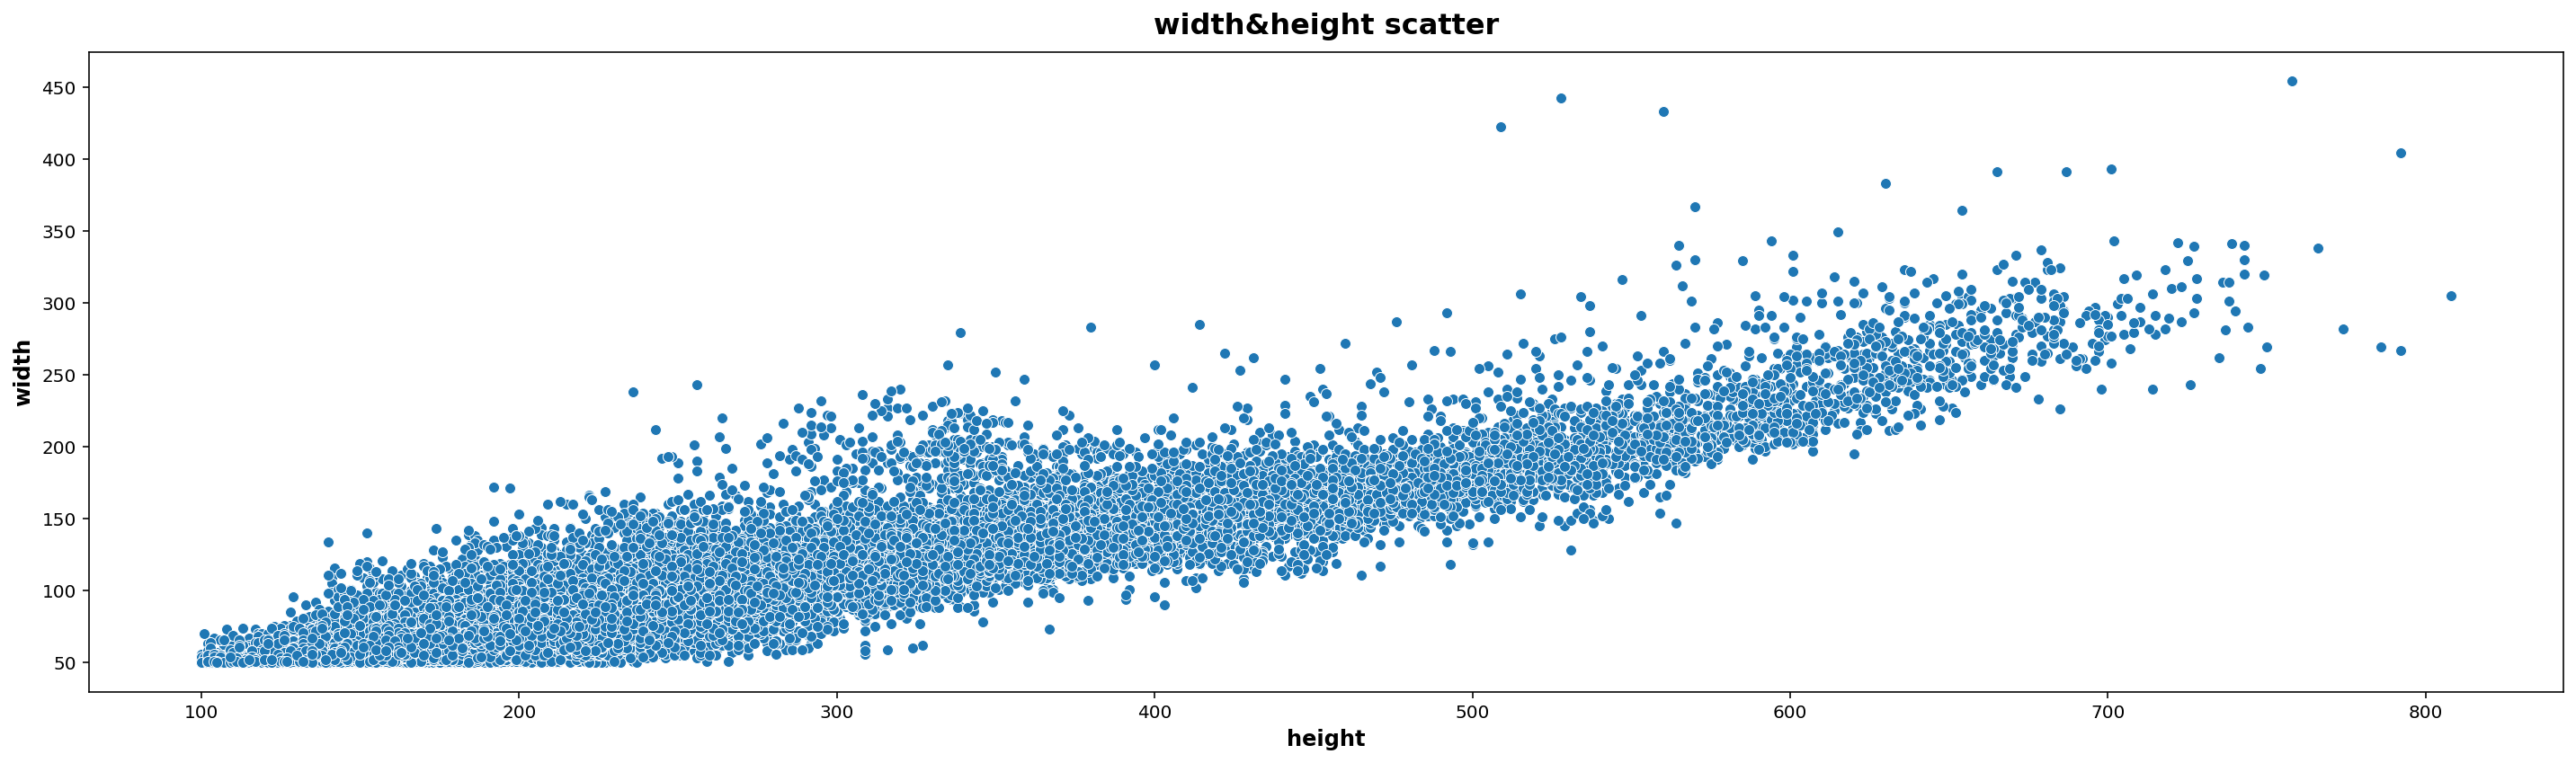

In [10]:
df = pd.DataFrame(data={"height": img_h, "width": img_w})
fig, ax = plt.subplots()
ax = sns.scatterplot(data=df, x="height", y="width")
ax.set_title("width&height scatter")

Text(0.5, 1.0, 'height and width dist')

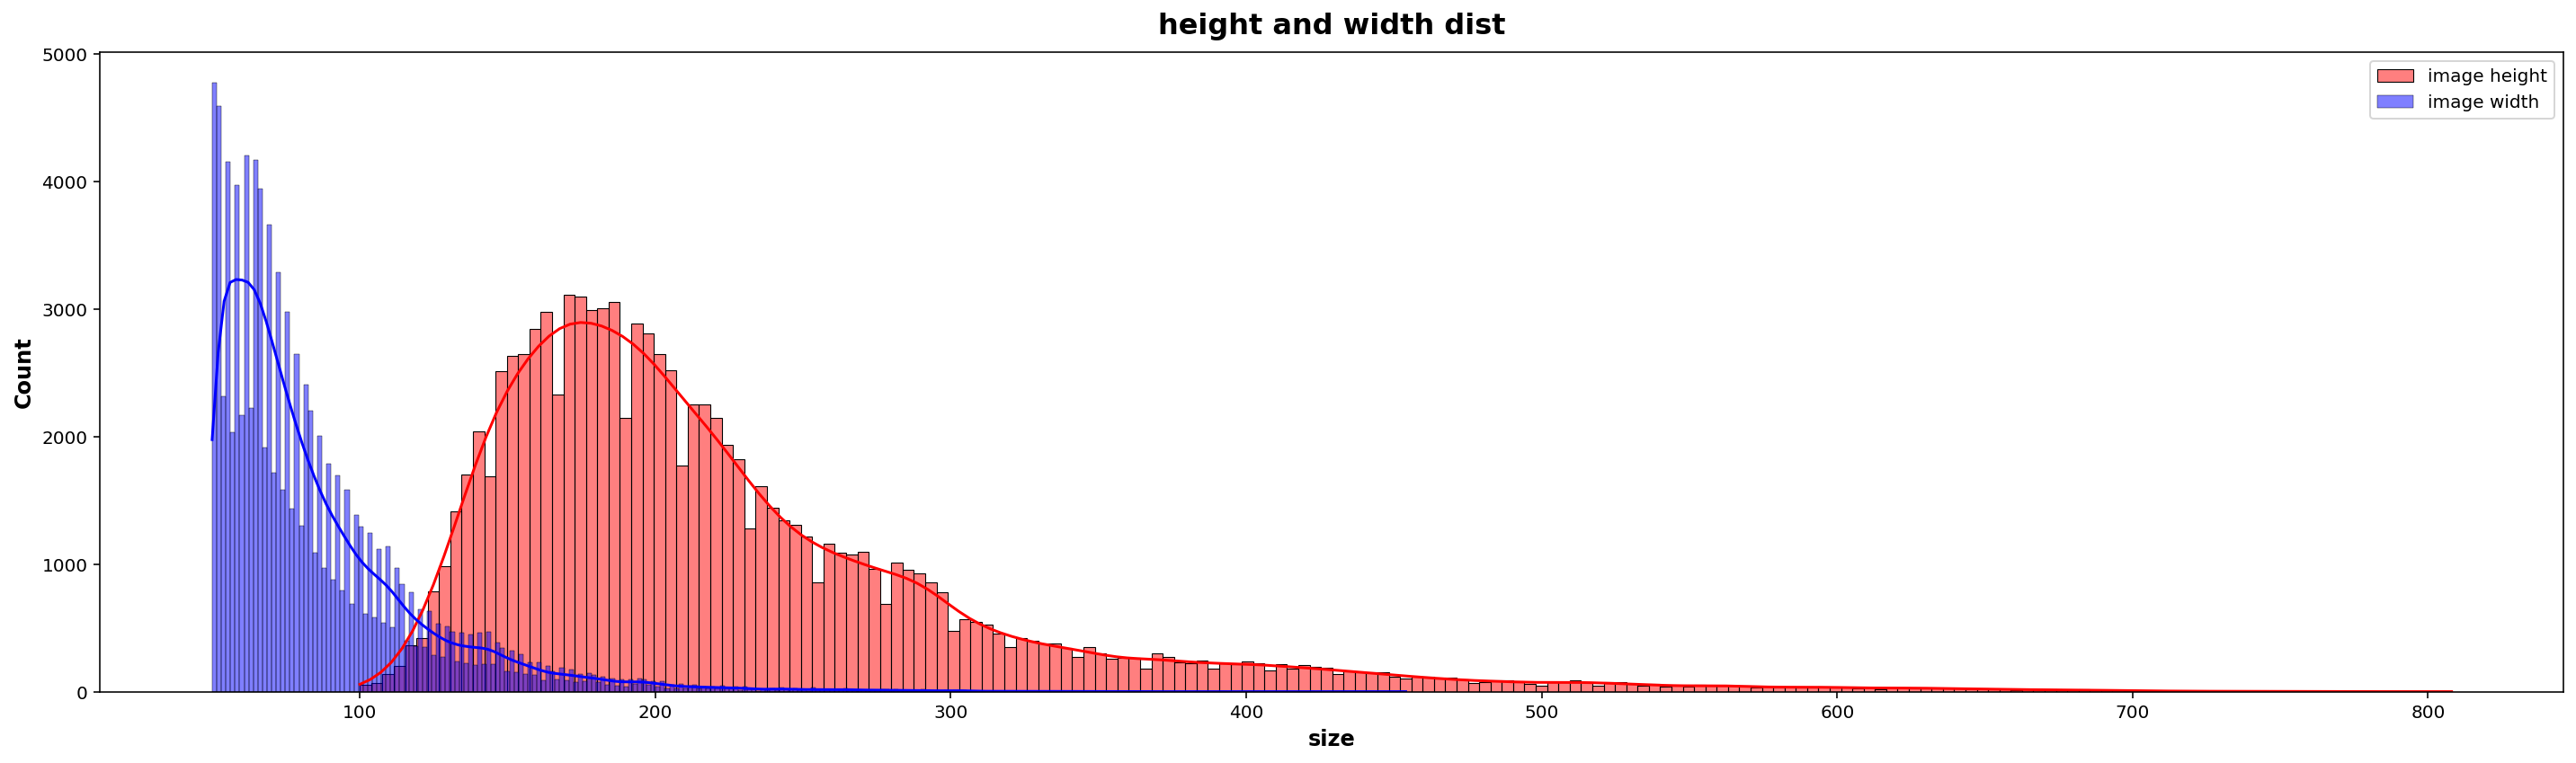

In [17]:
fig, ax = plt.subplots()
ax = sns.histplot(img_h, label="image height", kde=True, color="red", ax=ax)
ax = sns.histplot(img_w, label="image width", kde=True, color="blue", ax=ax)
ax.legend()
ax.set_xlabel("size")
ax.set_title("height and width dist")

Text(0.5, 1.0, 'height and width ratio dist')

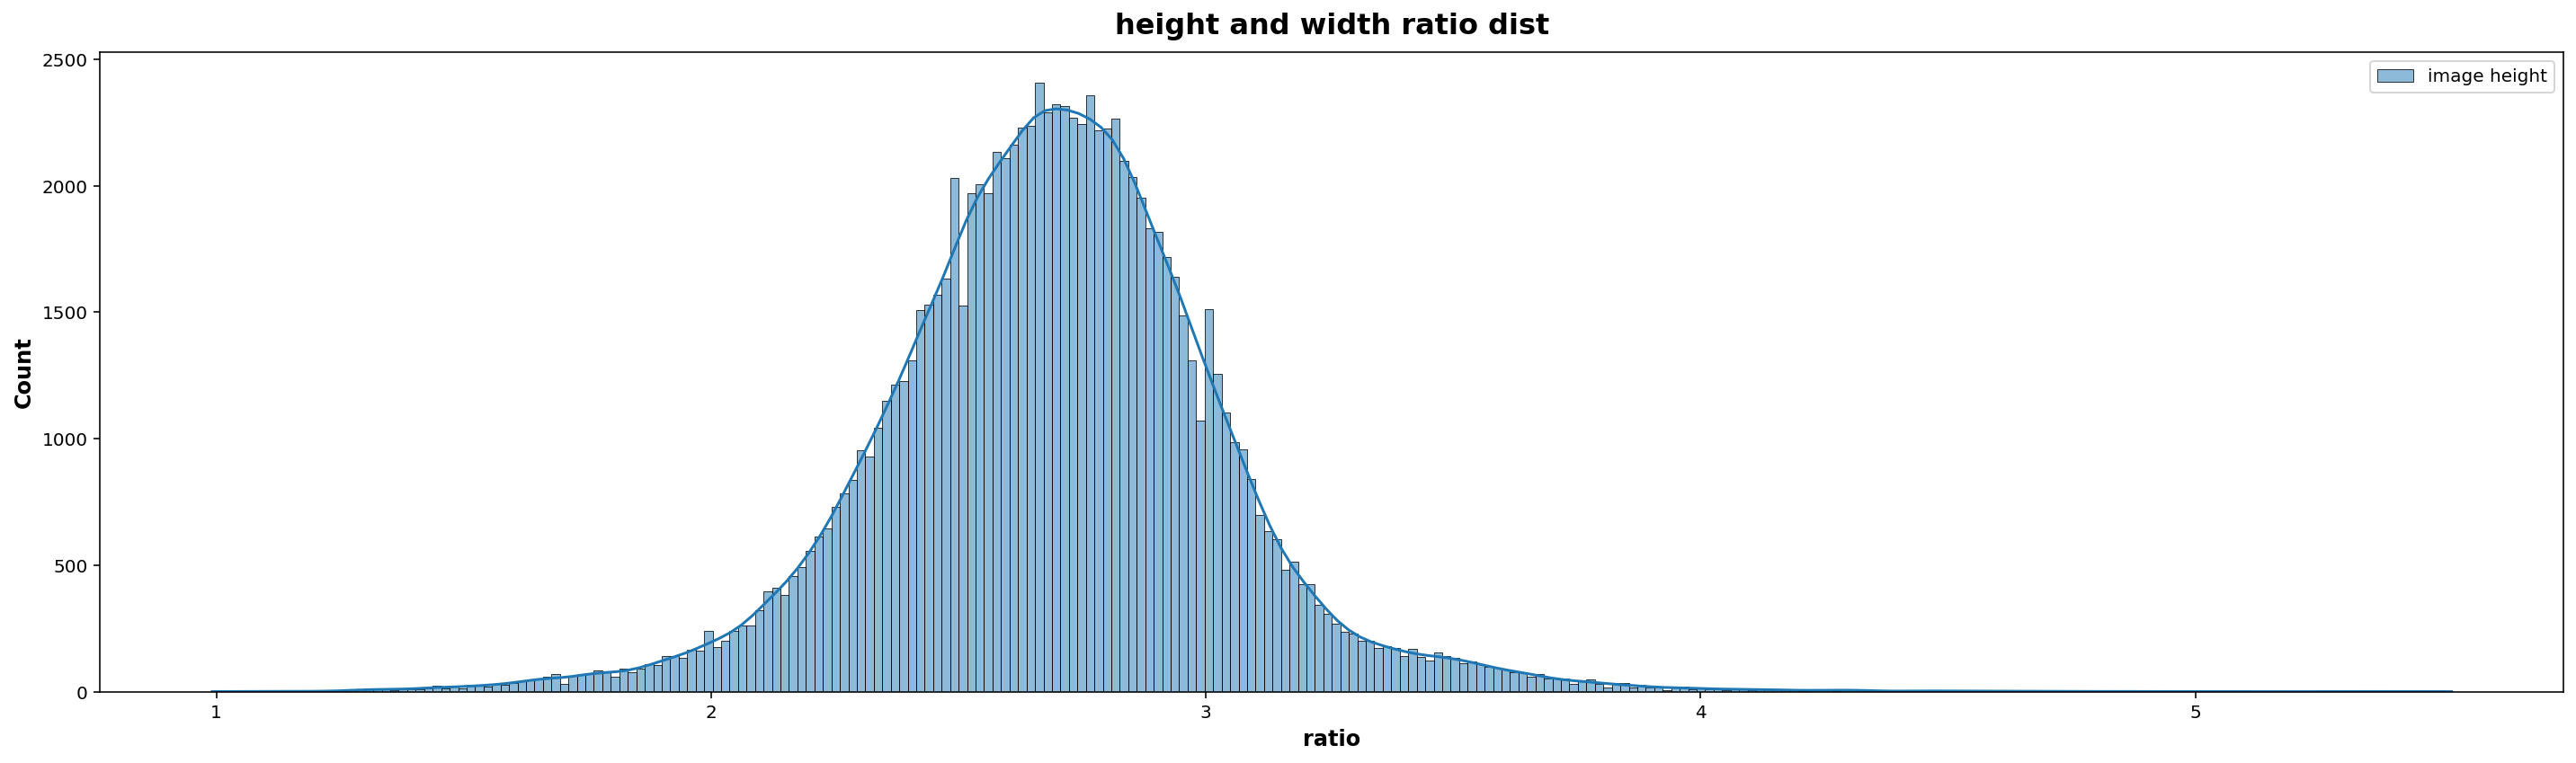

In [18]:
fig, ax = plt.subplots()
ax = sns.histplot(img_h / img_w, label="image height", kde=True, ax=ax)
ax.legend()
ax.set_xlabel("ratio")
ax.set_title("height and width ratio dist")

### 属性数量分布

In [19]:
anno_file_path = "./annotation.mat"
annotations = loadmat(anno_file_path)
attributes = [e.item() for e in annotations["attributes"][:, 0]]

In [20]:
train_df = pd.DataFrame.from_dict(data={"attribute": attributes, 
                                        "quantity": annotations["train_label"].sum(axis=0).tolist()})
val_df = pd.DataFrame.from_dict(data={"attribute": attributes, 
                                      "quantity": annotations["val_label"].sum(axis=0).tolist()})
test_df = pd.DataFrame.from_dict(data={"attribute": attributes, 
                                       "quantity": annotations["test_label"].sum(axis=0).tolist()})

<AxesSubplot:title={'center':'train dataset attribute quantity distribution'}, xlabel='attribute', ylabel='quantity'>

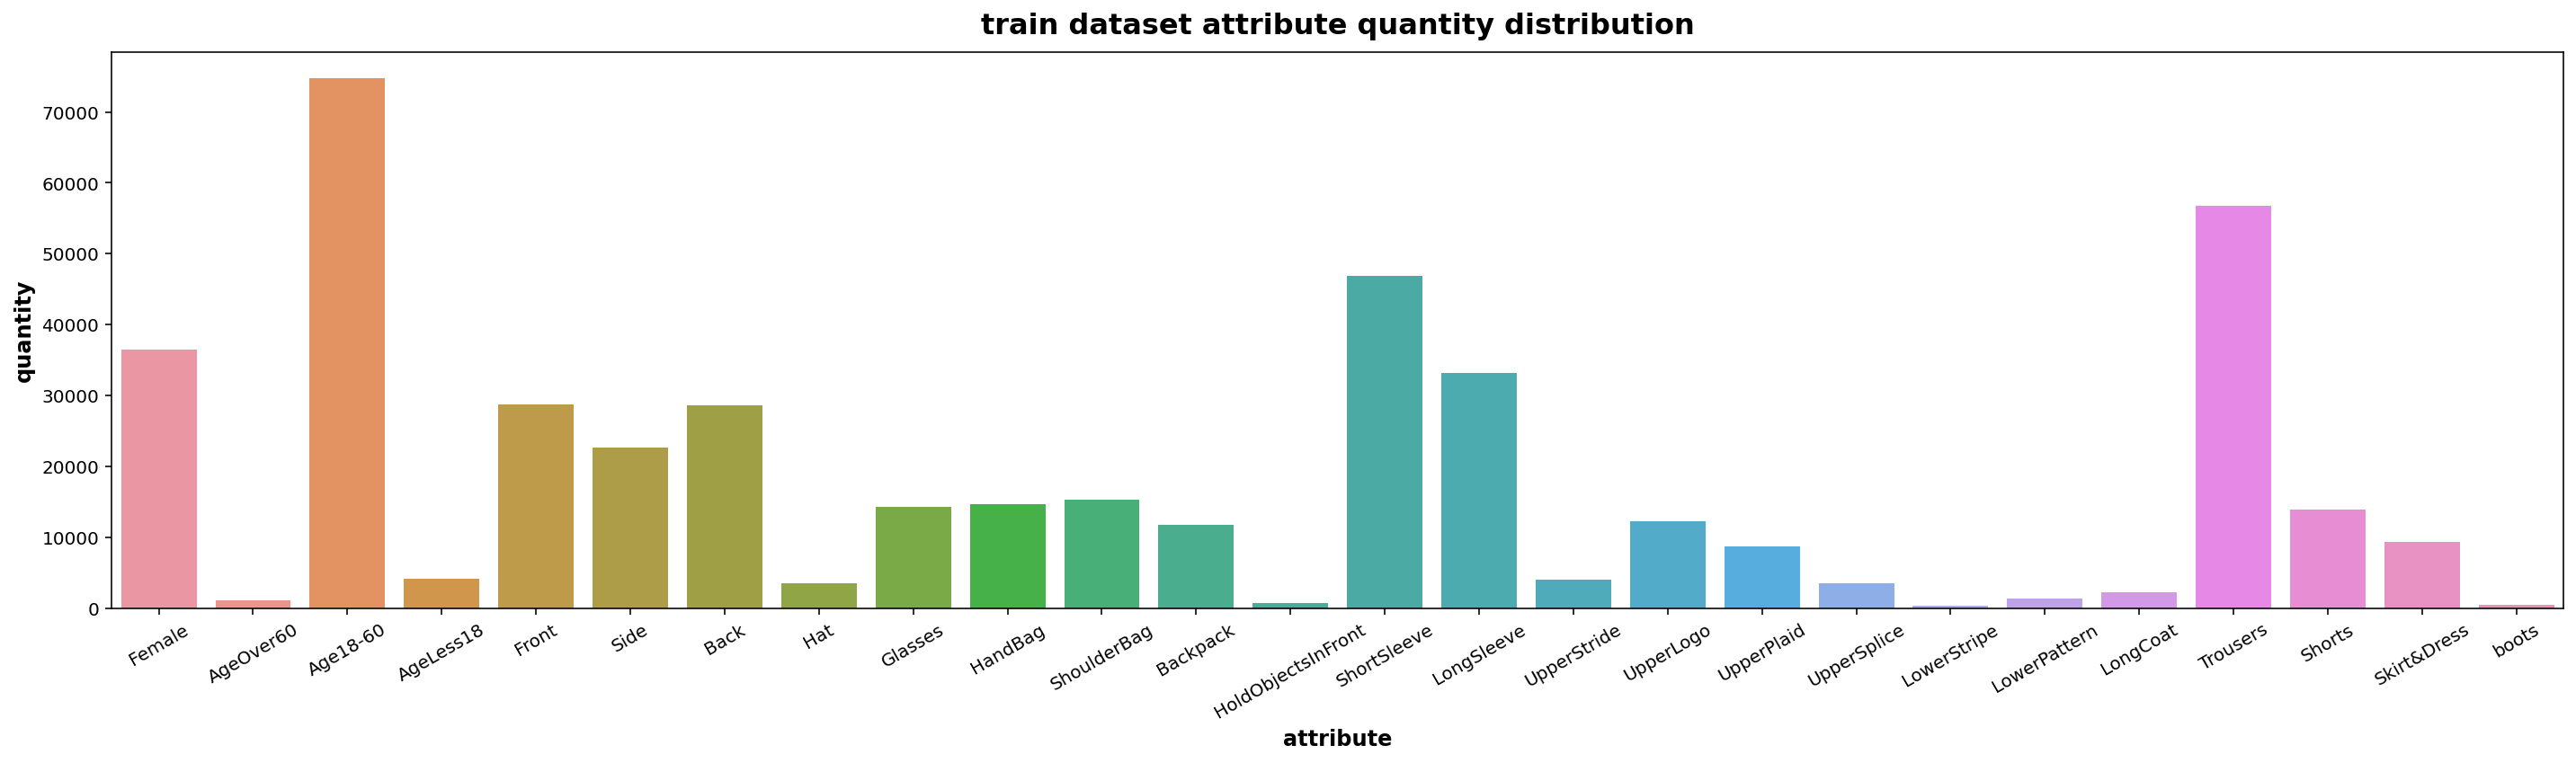

In [21]:
plt.xticks(rotation=30)
plt.title("train dataset attribute quantity distribution")
sns.barplot(data=train_df, x="attribute", y="quantity")

<AxesSubplot:title={'center':'val dataset attribute quantity distribution'}, xlabel='attribute', ylabel='quantity'>

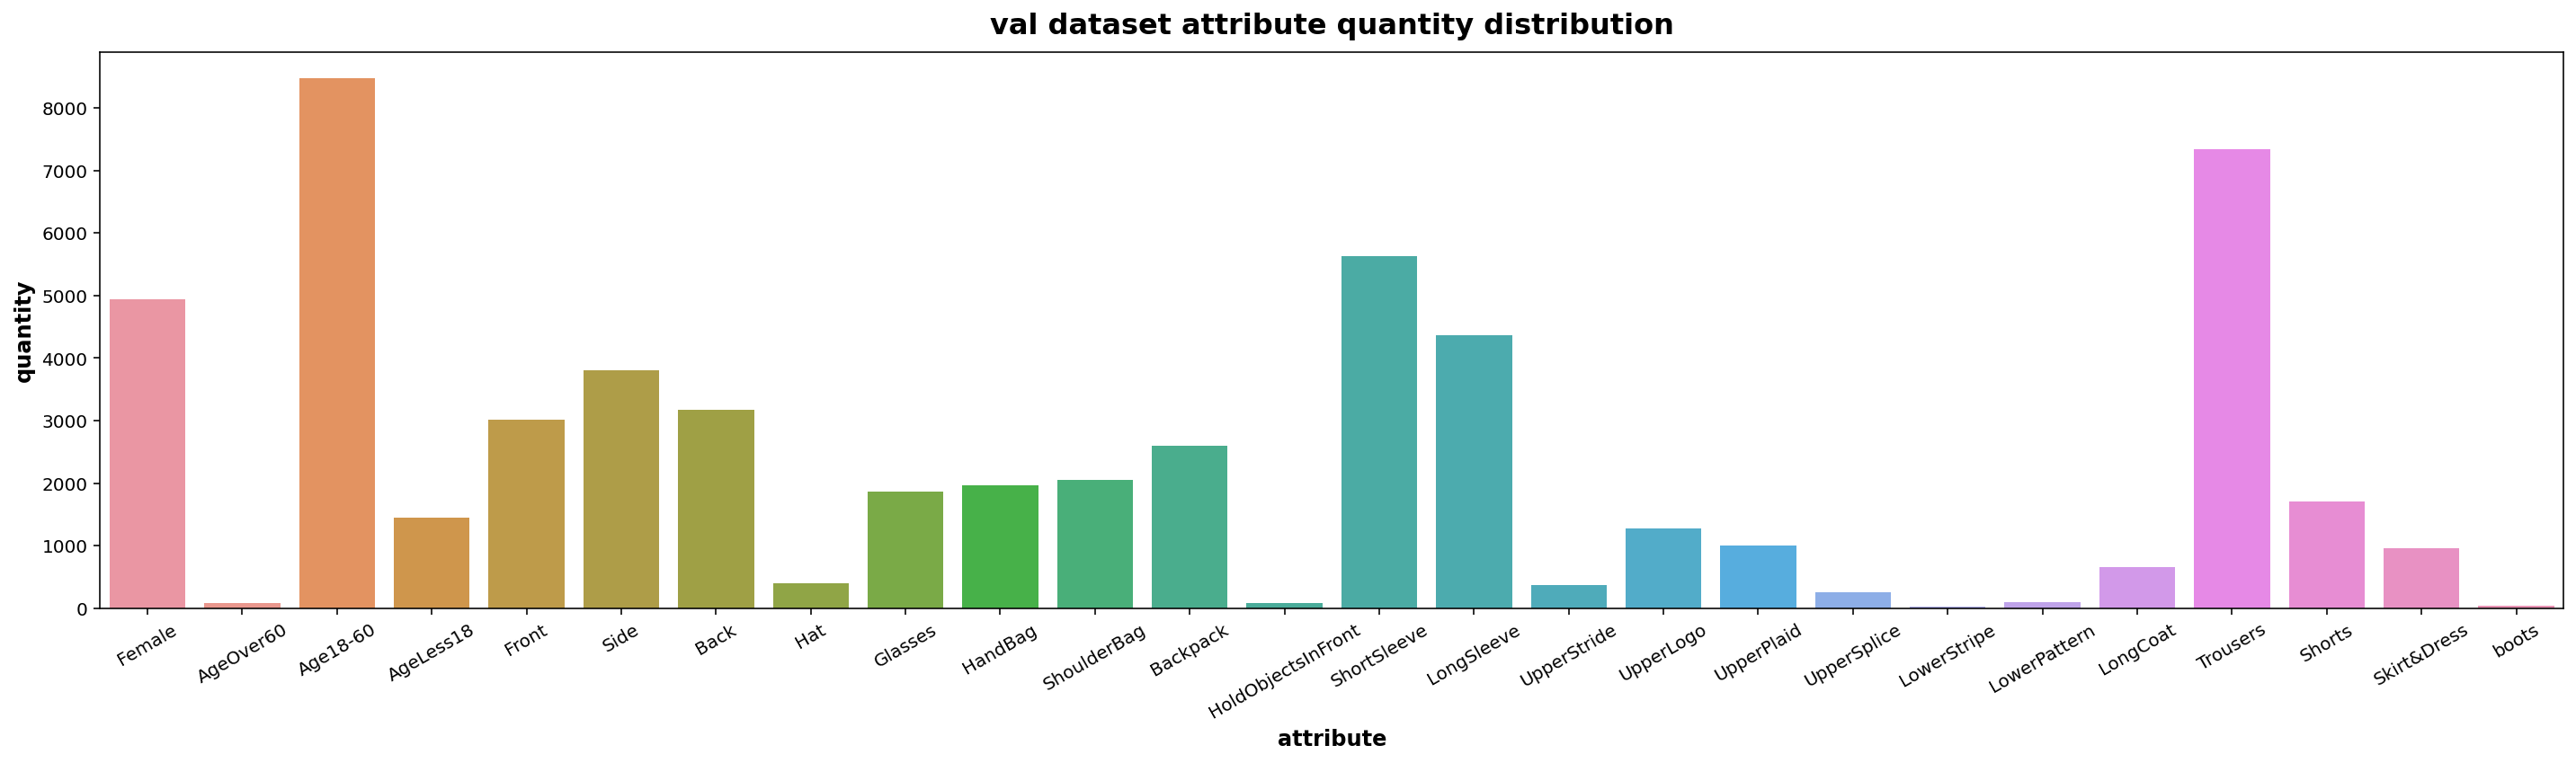

In [22]:
plt.xticks(rotation=30)
plt.title("val dataset attribute quantity distribution")
sns.barplot(data=val_df, x="attribute", y="quantity")

<AxesSubplot:title={'center':'test dataset attribute quantity distribution'}, xlabel='attribute', ylabel='quantity'>

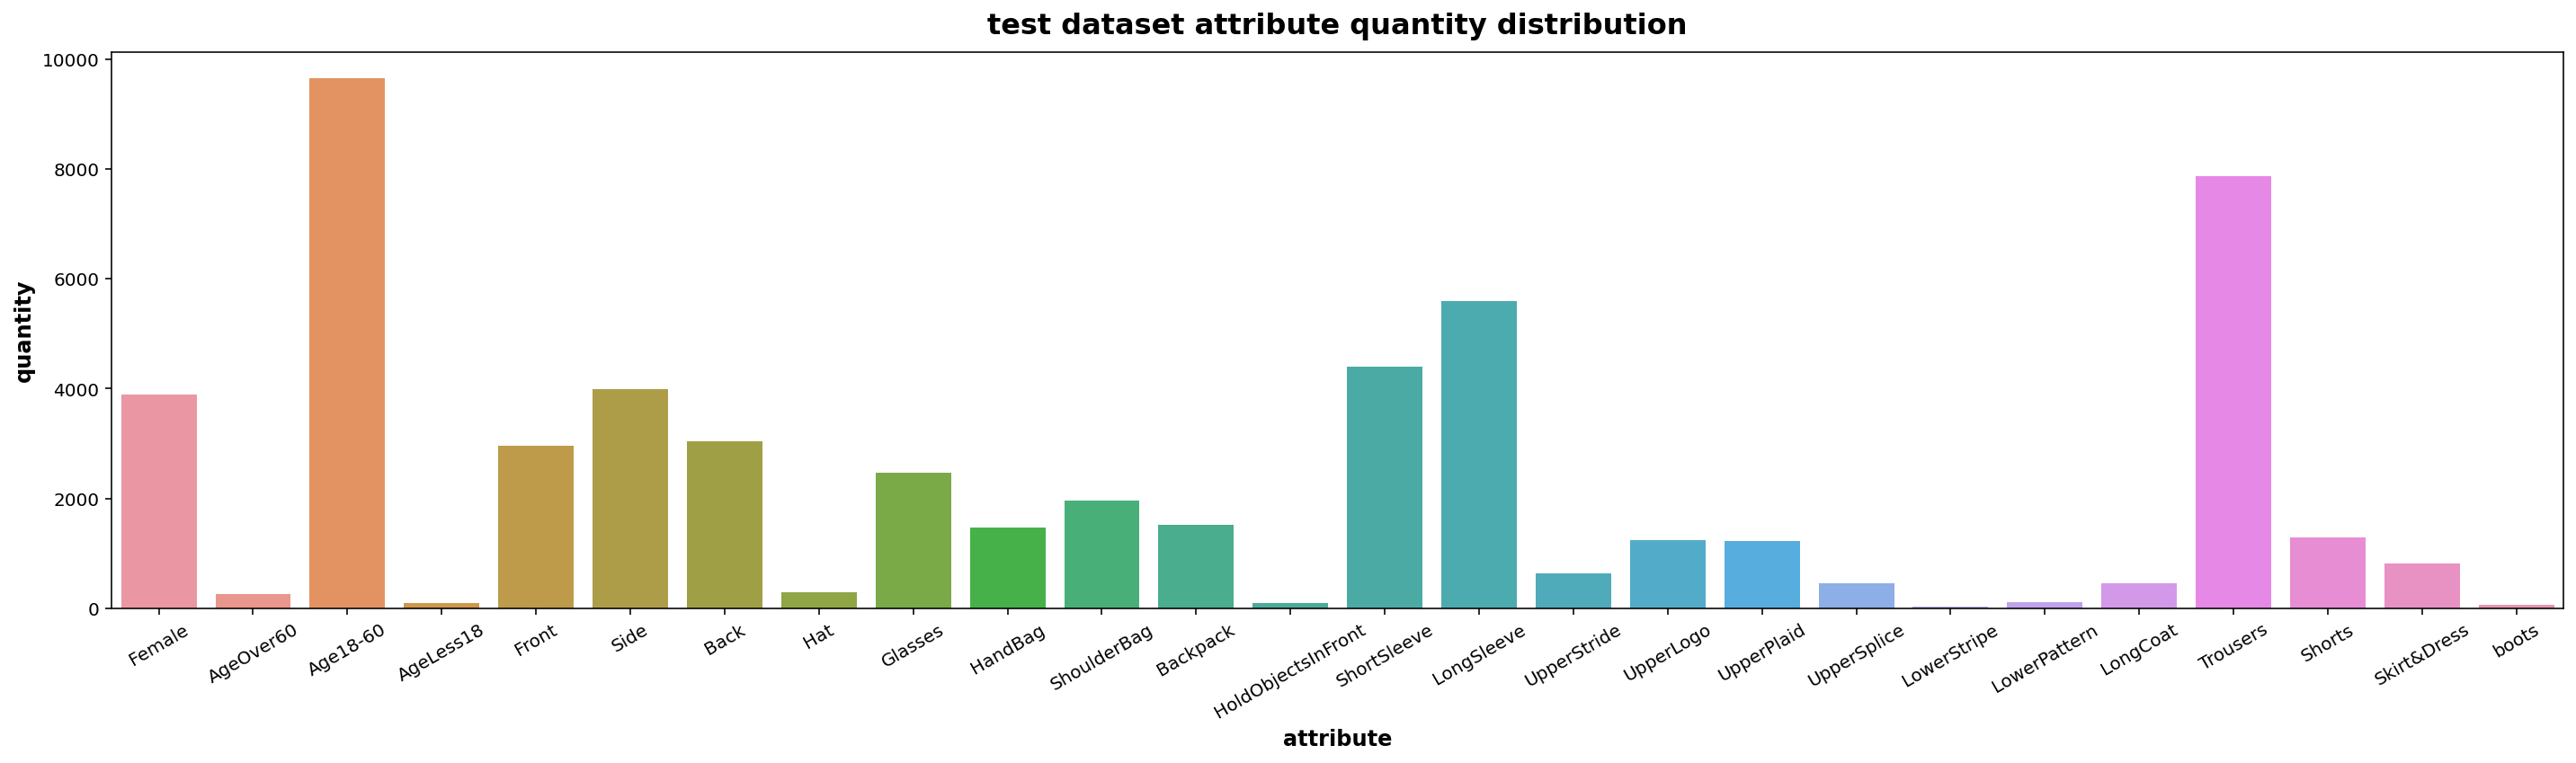

In [23]:
plt.xticks(rotation=30)
plt.title("test dataset attribute quantity distribution")
sns.barplot(data=test_df, x="attribute", y="quantity")